# New In This Version

- Data Augmentation
- Problems with memory allocation due vars number
    - Taking away drop layers in Conv
    - Changing batch size from 64 to 32

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Entorno de Ejecución


---



In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Aug 27 19:47:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    43W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
import numpy as np
import os
# import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as K
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam


# Creating dataset and model

In [5]:
img_train = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/train'


traindataset = K.utils.image_dataset_from_directory(img_train,
                                                    label_mode='categorical',
                                                    color_mode='grayscale',
                                                    batch_size=32,
                                                    image_size=(48,48),
                                                    seed=72,
                                                    )

img_test = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/test'

testdataset = K.utils.image_dataset_from_directory(img_test,
                                                    label_mode='categorical',
                                                    color_mode='grayscale',
                                                    batch_size=32,
                                                    image_size=(48,48),
                                                    seed=72,
                                                    )


Found 28729 files belonging to 7 classes.
Found 7208 files belonging to 7 classes.


In [6]:
model_path = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/modelv0827basic20CBep.h5'

model = Sequential()

model.add(K.layers.experimental.preprocessing.Rescaling(1./255,
                                                        input_shape=(48, 48, 1)))
model.add(K.layers.experimental.preprocessing.RandomFlip('horizontal', 0))
model.add(K.layers.experimental.preprocessing.RandomContrast([0.9, 1.1], 1))
model.add(K.layers.experimental.preprocessing.RandomRotation((-0.2, 0.3), seed=2))
model.add(Conv2D(1024, (5,5),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(256, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 random_flip (RandomFlip)    (None, 48, 48, 1)         0         
                                                                 
 random_contrast (RandomCont  (None, 48, 48, 1)        0         
 rast)                                                           
                                                                 
 random_rotation (RandomRota  (None, 48, 48, 1)        0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 1024)      26624     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 1024)     0

In [7]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

best = [K.callbacks.ModelCheckpoint(model_path,
                                   save_best_only=True)
#        K.callbacks.LearningRateScheduler(scheduler)
#        K.callbacks.EarlyStopping(monitor='val_loss',
#                                 patience=5,
#                                 verbose=1)
       ]

history = model.fit(traindataset,
                    validation_data=testdataset,
                    epochs=200,
                    verbose=True,
                    callbacks=best)

Epoch 1/200
898/898 [==============================] - 2301s 3s/step - loss: 1.8167 - accuracy: 0.2478 - val_loss: 1.7740 - val_accuracy: 0.2594
Epoch 2/200
898/898 [==============================] - 16s 18ms/step - loss: 1.7813 - accuracy: 0.2612 - val_loss: 1.7389 - val_accuracy: 0.2955
Epoch 3/200
898/898 [==============================] - 16s 18ms/step - loss: 1.7564 - accuracy: 0.2838 - val_loss: 1.6819 - val_accuracy: 0.3363
Epoch 4/200
898/898 [==============================] - 17s 18ms/step - loss: 1.7020 - accuracy: 0.3187 - val_loss: 1.5908 - val_accuracy: 0.3769
Epoch 5/200
898/898 [==============================] - 16s 18ms/step - loss: 1.6445 - accuracy: 0.3512 - val_loss: 1.5498 - val_accuracy: 0.3966
Epoch 6/200
898/898 [==============================] - 18s 19ms/step - loss: 1.6050 - accuracy: 0.3713 - val_loss: 1.5148 - val_accuracy: 0.4204
Epoch 7/200
898/898 [==============================] - 16s 18ms/step - loss: 1.5764 - accuracy: 0.3848 - val_loss: 1.4948 - val_ac

In [8]:
print(type(history.history))
print(history.history.keys())
largo = len(history.history['accuracy'])
largo

<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


200

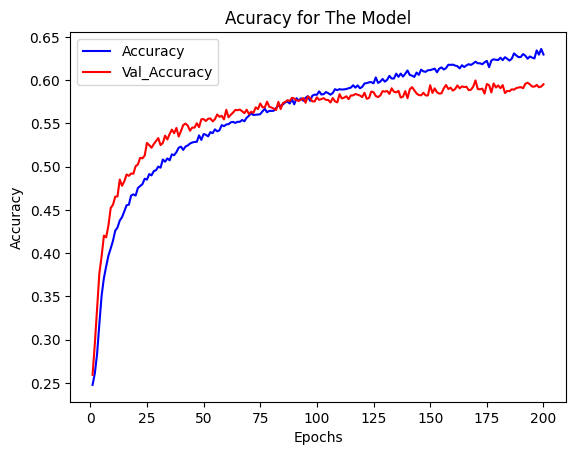

In [9]:
# Review Accuracy

plt.plot(range(1, largo + 1), history.history['accuracy'], '-b', label='Accuracy')
plt.plot(range(1, largo + 1), history.history['val_accuracy'], '-r', label='Val_Accuracy')
plt.title('Acuracy for The Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
eval = model.evaluate(testdataset, verbose=True, use_multiprocessing=True, return_dict=True)

226/226 [==============================] - 3s 13ms/step - loss: 1.1381 - accuracy: 0.5953


In [11]:
print(eval)

{'loss': 1.1381312608718872, 'accuracy': 0.5953107476234436}


In [12]:
prediction = model.predict(testdataset)

226/226 [==============================] - 3s 13ms/step


In [13]:
print(prediction)
print(prediction.shape)

[[2.1227492e-02 5.4244456e-06 4.4301614e-01 ... 1.4322513e-01
  2.6962798e-02 3.5556462e-01]
 [3.3999756e-06 1.5349836e-07 1.3271122e-05 ... 1.3402797e-04
  8.8131656e-06 5.0956705e-06]
 [1.6785303e-01 3.8742037e-05 1.8785536e-01 ... 2.4112575e-01
  4.0015516e-01 2.9711393e-03]
 ...
 [1.9156852e-01 2.7383061e-03 2.8754374e-01 ... 9.9922411e-02
  1.9062494e-01 2.2745550e-01]
 [2.6325631e-01 6.0059267e-07 1.6175358e-02 ... 5.4028898e-01
  1.7748153e-01 5.5855577e-04]
 [3.6588560e-03 5.3552884e-10 5.2781166e-03 ... 9.7721195e-01
  1.0049441e-02 3.1361420e-04]]
(7208, 7)


In [14]:
names = {k: v for v, k in enumerate(testdataset.class_names)}
print(names)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [15]:
y_true = []
y_pred = []

for x, y in testdataset:
    predictions = model.predict(x)

    predicted_classes = np.argmax(predictions, axis=1)

    true_classes = np.argmax(y.numpy(), axis=1)

    y_true.extend(true_classes)
    y_pred.extend(predicted_classes)


1/1 [==============================] - 0s 70ms/step


In [16]:
!pip install scikit-learn
!pip install seaborn

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

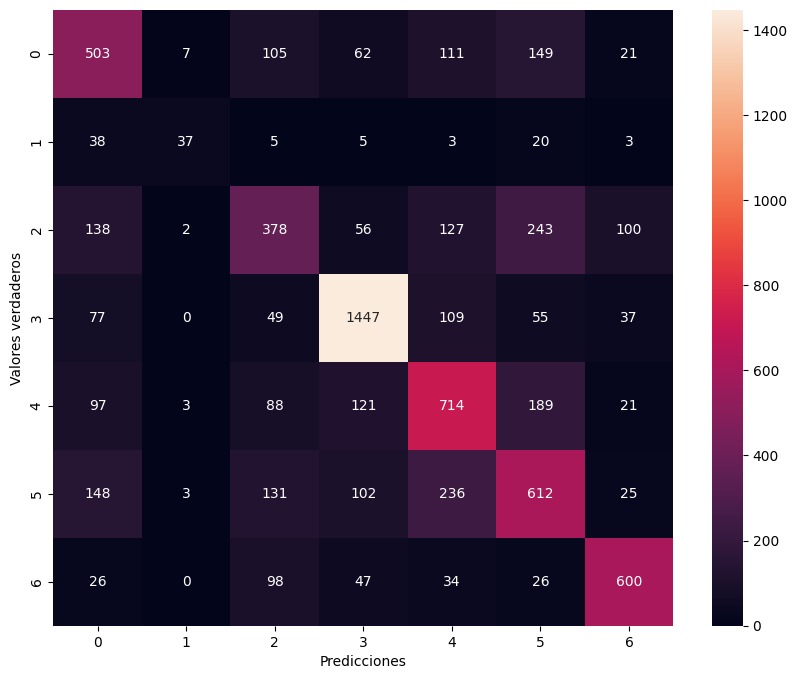

In [18]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.show()
